# Classification of Antarctic Penguin Species

This project aims to train a decision tree classifier on a data set of three antarctic pengiun species. The three species are the Adélie penguins, the Gentoo penguins and Chinstrap penguins.




The data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('penguins_lter.csv')

In [3]:
raw_data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## Exploration of features of interest

In [4]:
raw_data.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [5]:
data = raw_data[['Species', 'Region', 'Island', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']]

In [6]:
#clean data with nan values
data = data.dropna()

In [7]:
data.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.3,20.6,190.0,3650.0,MALE


### First we visualize the pair wise relationship and individual distributions of the penguin species.

We immediately recognize that the Gentoo species is easily identifiable based on the culmen depth, flipper length and body mass. The culmen length, on the other hand, is essential to distinguish between the Adelie and the Chinstrap species.

Text(0.5, 1.08, 'Penguin Size Distribution by Species')

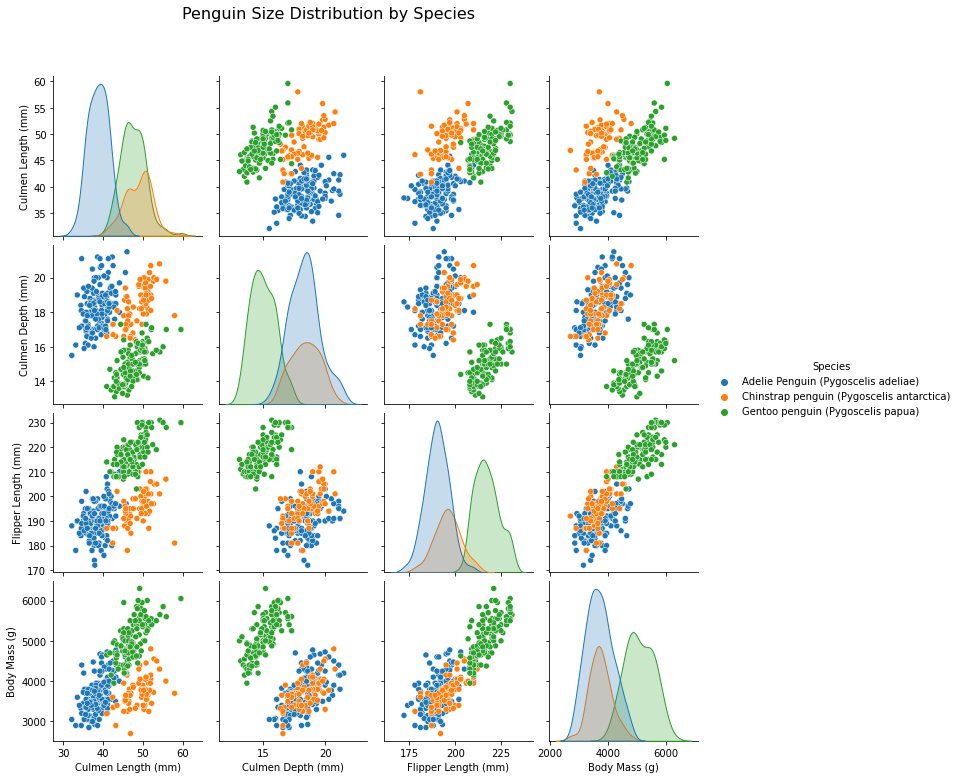

In [8]:
g = sns.pairplot(data, hue = 'Species')
g.fig.suptitle("Penguin Size Distribution by Species", y=1.08, size = 16, ha = 'right')

### We repeat the visualization while further dividing the dataset by sex

In [9]:
#Only keep the datapoints with known sex
data_sex_known = data[(data['Sex'] == 'FEMALE') | (data['Sex'] == 'MALE')]
data_sex_known['Species_Sex'] = data_sex_known['Species'].str[:3] + '. ' + data_sex_known['Sex'].str[0]


C:\Users\gmoha\AppData\Local\Temp/ipykernel_12924/3148976498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sex_known['Species_Sex'] = data_sex_known['Species'].str[:3] + '. ' + data_sex_known['Sex'].str[0]


Text(0.5, 1.08, 'Penguin Size Distribution by Species and Sex')

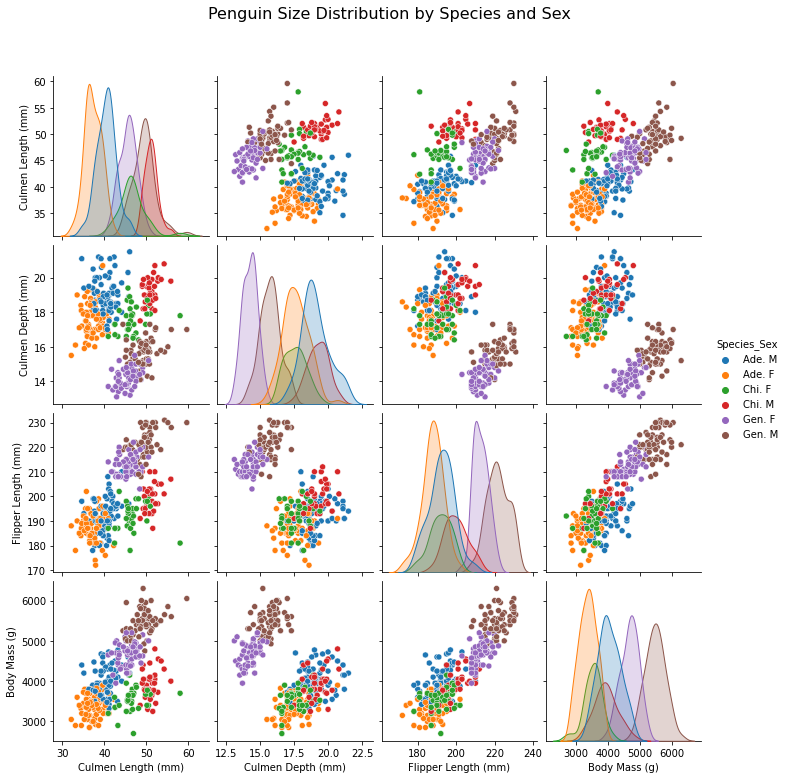

In [10]:
g = sns.pairplot(data_sex_known, hue = 'Species_Sex')
g.fig.suptitle("Penguin Size Distribution by Species and Sex", y=1.08, size = 16)

## Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [37]:
X, y = data[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']], data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = sum(y_predict == y_test)/len(y_test)
print("Decision Tree Species Prediction Accuracy: {:.3f}".format(accuracy))

Decision Tree Species Prediction Accuracy: 0.976


In [41]:
X, y = data[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']], data['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = sum(y_predict == y_test)/len(y_test)
print("Decision Tree Sex Prediction Accuracy: {:.3f}".format(accuracy))

Decision Tree Sex Prediction Accuracy: 0.893


In [39]:
X, y = data_sex_known[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']], data_sex_known['Species_Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
accuracy = sum(y_predict == y_test)/len(y_test)
print("Decision Tree Species AND Sex Prediction Accuracy: {:.3f}".format(accuracy))

Decision Tree Species AND Sex Prediction Accuracy: 0.810
